# ***Librerias***

In [4]:
import networkx as nx
import matplotlib.pyplot as plt

# ***Crear grafo***

Grafo:
A: ['B', 'C', 'A', 'A', 'D']
B: ['A', 'C']
C: ['B', 'A']
D: ['A']



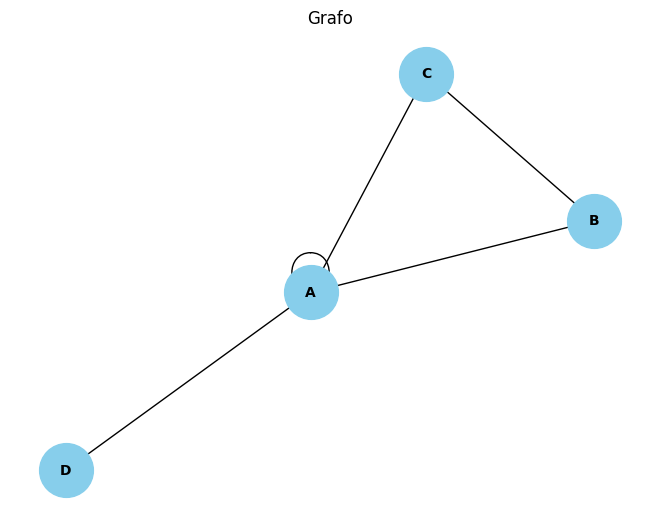

In [8]:
class Grafo:
    def __init__(self):
        self.vertices = {}

    def agregar_vertice(self, vertice):
        if vertice not in self.vertices:
            self.vertices[vertice] = []

    def agregar_arista(self, inicio, fin):
        if inicio in self.vertices and fin in self.vertices:
            self.vertices[inicio].append(fin)
            self.vertices[fin].append(inicio)

    def __str__(self):
        resultado = ""
        for vertice, adyacentes in self.vertices.items():
            resultado += f"{vertice}: {adyacentes}\n"
        return resultado

    def graficar(self):
        G = nx.Graph()
        for vertice, adyacentes in self.vertices.items():
            for adyacente in adyacentes:
                G.add_edge(vertice, adyacente)

        pos = nx.spring_layout(G)
        nx.draw(G, pos, with_labels=True, node_color='skyblue', node_size=1500, font_size=10, font_weight='bold', edge_color='black', linewidths=1, arrows=False)
        plt.title("Grafo")
        plt.show()

grafo = Grafo()

grafo.agregar_vertice("A")
grafo.agregar_vertice("B")
grafo.agregar_vertice("C")
grafo.agregar_vertice("D")

grafo.agregar_arista("A", "B")
grafo.agregar_arista("B", "C")
grafo.agregar_arista("C", "A")
grafo.agregar_arista("A", "A")
grafo.agregar_arista("A", "D")

print("Grafo:")
print(grafo)

grafo.graficar()

# ***Grafo simple***

En teoría de grafos es un grafo qeu no tiene bucles ni aristas múltiples entre los mismos dos vértices.

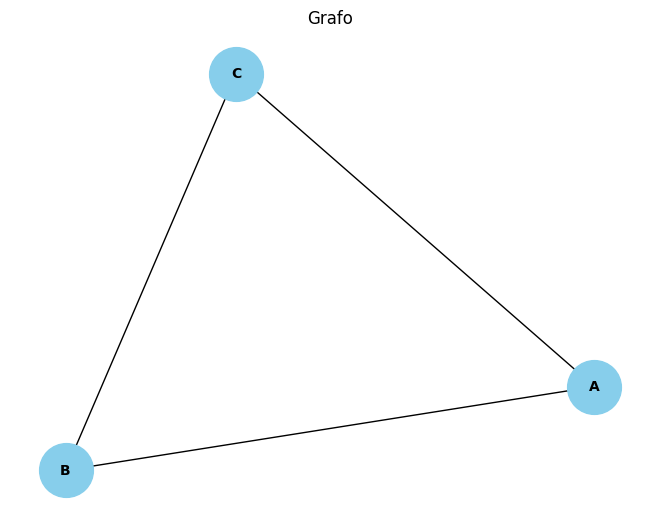

In [10]:
grafo = Grafo()

grafo.agregar_vertice("A")
grafo.agregar_vertice("B")
grafo.agregar_vertice("C")

grafo.agregar_arista("A", "B")
grafo.agregar_arista("B", "C")
grafo.agregar_arista("C", "A")

grafo.graficar()


# ***Grafo conexo***

Un grafo es conexo si no hay vértices aislados y si, para cualquier par de vértices en el grafo, existe al menos un camino que los conecta.

¿El grafo es conexo? True


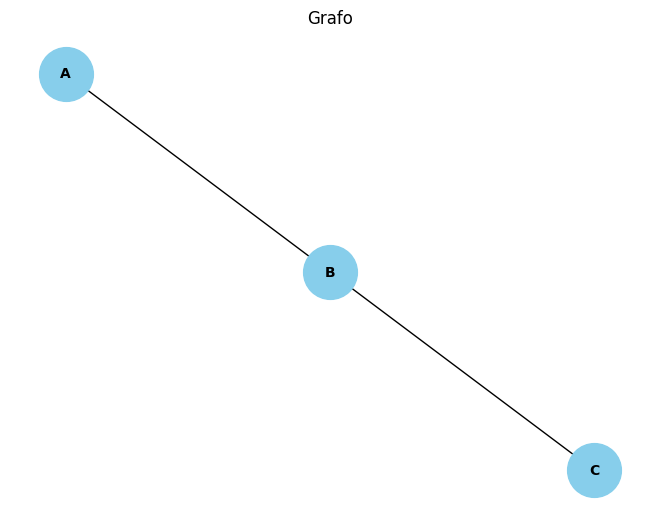

In [13]:
class Grafo:
    def __init__(self):
        self.vertices = {}

    def agregar_vertice(self, vertice):
        if vertice not in self.vertices:
            self.vertices[vertice] = []

    def agregar_arista(self, inicio, fin):
        if inicio in self.vertices and fin in self.vertices:
            self.vertices[inicio].append(fin)
            self.vertices[fin].append(inicio)

    def graficar(self):
        G = nx.Graph()
        for vertice, adyacentes in self.vertices.items():
            for adyacente in adyacentes:
                G.add_edge(vertice, adyacente)

        pos = nx.spring_layout(G)
        nx.draw(G, pos, with_labels=True, node_color='skyblue', node_size=1500, font_size=10, font_weight='bold', edge_color='black', linewidths=1, arrows=False)
        plt.title("Grafo")
        plt.show()

    def es_conexo(self):
        visitados = set()
        def dfs(vertice):
            visitados.add(vertice)
            for adyacente in self.vertices[vertice]:
                if adyacente not in visitados:
                    dfs(adyacente)
        primer_vertice = next(iter(self.vertices.keys()))
        dfs(primer_vertice)
        return len(visitados) == len(self.vertices)

grafo = Grafo()

grafo.agregar_vertice("A")
grafo.agregar_vertice("B")
grafo.agregar_vertice("C")

grafo.agregar_arista("A", "B")
grafo.agregar_arista("B", "C")

print("¿El grafo es conexo?", grafo.es_conexo())
grafo.graficar()


# ***Subdivisión elemental de una arista***

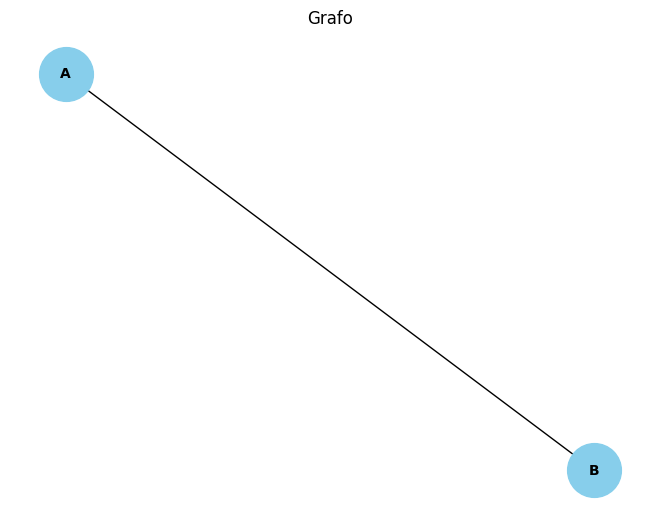

Vertices y sus conexiones:
A: ['C']
B: ['C']
C: ['A', 'B']


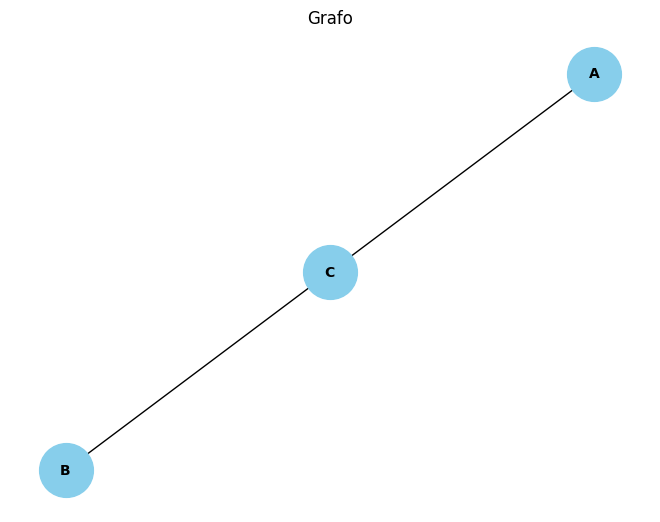

In [15]:
class Grafo:
    def __init__(self):
        self.vertices = {}

    def agregar_vertice(self, vertice):
        if vertice not in self.vertices:
            self.vertices[vertice] = []

    def agregar_arista(self, inicio, fin):
        if inicio in self.vertices and fin in self.vertices:
            self.vertices[inicio].append(fin)
            self.vertices[fin].append(inicio)

    def graficar(self):
        G = nx.Graph()
        for vertice, adyacentes in self.vertices.items():
            for adyacente in adyacentes:
                G.add_edge(vertice, adyacente)

        pos = nx.spring_layout(G)
        nx.draw(G, pos, with_labels=True, node_color='skyblue', node_size=1500, font_size=10, font_weight='bold', edge_color='black', linewidths=1, arrows=False)
        plt.title("Grafo")
        plt.show()

    def es_conexo(self):
        visitados = set()
        def dfs(vertice):
            visitados.add(vertice)
            for adyacente in self.vertices[vertice]:
                if adyacente not in visitados:
                    dfs(adyacente)
        primer_vertice = next(iter(self.vertices.keys()))
        dfs(primer_vertice)
        return len(visitados) == len(self.vertices)

    def subdividir_arista(self, inicio, fin, nuevo_vertice):
        if inicio in self.vertices and fin in self.vertices and fin in self.vertices[inicio]:
            self.vertices[inicio].remove(fin)
            self.vertices[fin].remove(inicio)
            self.vertices[inicio].append(nuevo_vertice)
            self.vertices[nuevo_vertice] = [inicio, fin]
            self.vertices[fin].append(nuevo_vertice)

grafo = Grafo()
grafo.agregar_vertice("A")
grafo.agregar_vertice("B")

grafo.agregar_arista("A", "B")
grafo.graficar()


grafo.subdividir_arista("A", "B", "C")
print("Vertices y sus conexiones:")
for vertice, conexiones in grafo.vertices.items():
    print(f"{vertice}: {conexiones}")
grafo.graficar()


Grafo antes de eliminar el vértice 'B':
{'A': ['B', 'C'], 'B': ['A', 'C'], 'C': ['B', 'A']}


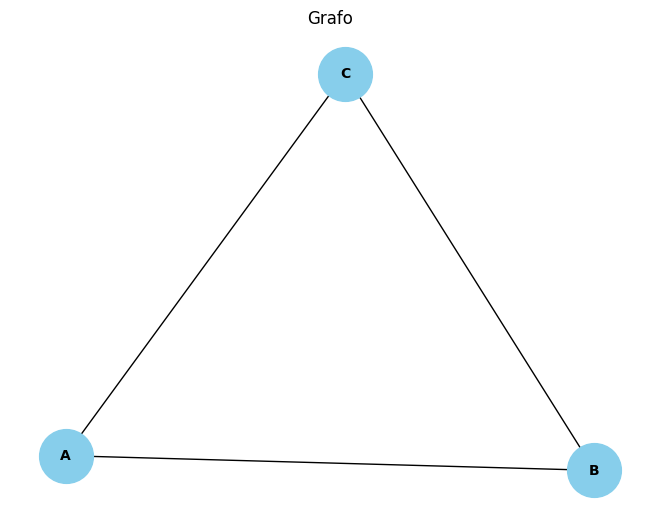


Grafo después de eliminar el vértice 'B' de manera débil:
{'A': ['C'], 'C': ['A']}


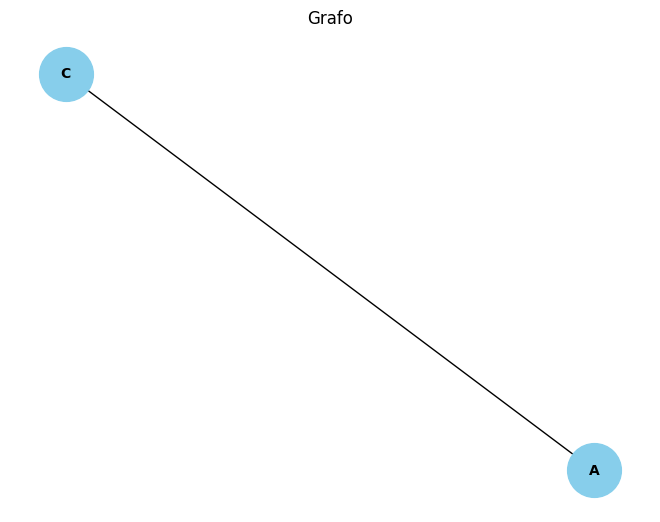

In [16]:
class Grafo:
    def __init__(self):
        self.vertices = {}

    def agregar_vertice(self, vertice):
        if vertice not in self.vertices:
            self.vertices[vertice] = []

    def agregar_arista(self, inicio, fin):
        if inicio in self.vertices and fin in self.vertices:
            self.vertices[inicio].append(fin)
            self.vertices[fin].append(inicio)

    def graficar(self):
        G = nx.Graph()
        for vertice, adyacentes in self.vertices.items():
            for adyacente in adyacentes:
                G.add_edge(vertice, adyacente)

        pos = nx.spring_layout(G)
        nx.draw(G, pos, with_labels=True, node_color='skyblue', node_size=1500, font_size=10, font_weight='bold', edge_color='black', linewidths=1, arrows=False)
        plt.title("Grafo")
        plt.show()

    def es_conexo(self):
        visitados = set()
        def dfs(vertice):
            visitados.add(vertice)
            for adyacente in self.vertices[vertice]:
                if adyacente not in visitados:
                    dfs(adyacente)
        primer_vertice = next(iter(self.vertices.keys()))
        dfs(primer_vertice)
        return len(visitados) == len(self.vertices)

    def subdividir_arista(self, inicio, fin, nuevo_vertice):
        if inicio in self.vertices and fin in self.vertices and fin in self.vertices[inicio]:
            self.vertices[inicio].remove(fin)
            self.vertices[fin].remove(inicio)
            self.vertices[inicio].append(nuevo_vertice)
            self.vertices[nuevo_vertice] = [inicio, fin]
            self.vertices[fin].append(nuevo_vertice)

    def eliminar_vertice_debil(self, vertice):
        if vertice in self.vertices:
            del self.vertices[vertice]
            for v in self.vertices:
                if vertice in self.vertices[v]:
                    self.vertices[v].remove(vertice)

    def __str__(self):
        return str(self.vertices)


grafo = Grafo()

grafo.agregar_vertice("A")
grafo.agregar_vertice("B")
grafo.agregar_vertice("C")

grafo.agregar_arista("A", "B")
grafo.agregar_arista("B", "C")
grafo.agregar_arista("C", "A")

print("Grafo antes de eliminar el vértice 'B':")
print(grafo)
grafo.graficar()
grafo.eliminar_vertice_debil("B")

print("\nGrafo después de eliminar el vértice 'B' de manera débil:")
print(grafo)
grafo.graficar()
